In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/segment-it-pr22-competition.zip" -d "/content/drive/MyDrive/PatternPhase2/dataset"

Archive:  /content/drive/MyDrive/segment-it-pr22-competition.zip
  inflating: /content/drive/MyDrive/PatternPhase2/dataset/test.csv  
  inflating: /content/drive/MyDrive/PatternPhase2/dataset/train.csv  


In [2]:
from sklearn.preprocessing import OneHotEncoder
def HotEncoding(X):
    print(X.shape)
    X2 =  OneHotEncoder().fit_transform(X['Gender'].values.reshape(-1,1)).toarray()
    dfHot2 = pd.DataFrame(X2, columns=['Gender_' + str(int(i)) for i in range(X2.shape[1])])
    
    X = pd.concat([X, dfHot2], axis=1)
    X = X.drop(['Gender'], axis=1)


    X3= OneHotEncoder().fit_transform(X['Ever_Married'].values.reshape(-1,1)).toarray()

    dfHot3 = pd.DataFrame(X3, columns=['Ever_Married_' + str(int(i)) for i in range(X3.shape[1])])
    X = pd.concat([X, dfHot3], axis=1)
    
    X = X.drop(['Ever_Married'], axis=1)

    X4= OneHotEncoder().fit_transform(X['Graduated'].values.reshape(-1,1)).toarray()
    dfHot4 = pd.DataFrame(X4, columns=['Graduated_' + str(int(i)) for i in range(X4.shape[1])])
    X = pd.concat([X, dfHot4], axis=1)
    X = X.drop(['Graduated'], axis=1)
    print (X.shape)
    return X

In [28]:
from sklearn.preprocessing import  LabelEncoder
def labelEncodingFeature(X):
  X['Profession'] = LabelEncoder().fit_transform(X['Profession'])
  X['Spending_Score'] = LabelEncoder().fit_transform(X['Spending_Score'])
  X['Var_1'] = LabelEncoder().fit_transform(X['Var_1'])
  X['Graduated'] = LabelEncoder().fit_transform(X['Graduated'])
  X['Gender'] = LabelEncoder().fit_transform(X['Gender'])
  X['Ever_Married'] = LabelEncoder().fit_transform(X['Ever_Married'])
  return X

In [4]:
from sklearn.preprocessing import MinMaxScaler
def NormalizationFeatures(X):
    names = [ 'Age','Work_Experience','Family_Size']
    scale=MinMaxScaler().fit(X[names])
    X[names]=scale.transform(X[names])
    return X

In [5]:
from sklearn.preprocessing import  LabelEncoder
def labelEncoding(X):
  
  X['Profession'] = LabelEncoder().fit_transform(X['Profession'])
  X['Spending_Score'] = LabelEncoder().fit_transform(X['Spending_Score'])
  X['Var_1'] = LabelEncoder().fit_transform(X['Var_1'])
  return X

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def loadTrainData():
    
    X = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv') 
    #data.isnull().sum()
    #from sklearn.preprocessing import  LabelEncoder    
    #data['Segmentation'] = LabelEncoder().fit_transform(data['Segmentation'])
    #Y= data['Segmentation']            #'Ever_Married','Gender'
    #X= data.drop(labels=['Segmentation','ID'], axis=1)
    
    #X.dropna(axis=0,inplace=True)
    
    #X_new=FillNullValues(X)
    
    
    X=PreAgeGraduation(X)
    X=PreGraduatedProfession(X)
    
    X_new = X.dropna(axis = 0, how ='any')
    #print(X_new)
    #print(X_new.isnull().sum())
    #X['Segmentation'] = LabelEncoder().fit_transform(X['Segmentation'])
    #X=NormalizationFeatures(X)
    Y = X_new['Segmentation']            #'Ever_Married','Gender'
    X_new = X_new.drop(labels=['Segmentation','ID'], axis=1)
    
    print(X_new.isnull().sum())
    #print(X_new.shape)
    ##X=FillNullValues(X)
    #X_new=HotEncoding(X_new)    

    X_new=labelEncodingFeature(X_new)

    #X_new=labelEncoding(X_new)
    #print(X_new.shape)
    #print(len(Y))
    return X_new,Y

loadTrainData()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


(      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
 0          1             1   33          1           2              0.0   
 1          0             0   42          1           1              5.0   
 2          1             1   80          1           4              0.0   
 3          0             1   66          1           0              0.0   
 4          0             1   39          1           5              8.0   
 ...      ...           ...  ...        ...         ...              ...   
 7160       1             1   42          1           0              0.0   
 7161       1             1   48          1           0              0.0   
 7162       0             1   51          1           0              8.0   
 7163       0             1   25          0           9              2.0   
 7164       1             1   28          1           4              0.0   
 
       Spending_Score  Family_Size  Var_1  
 0                  0          2.0      5 

In [71]:
import pandas as pd
from sklearn.preprocessing import  LabelEncoder

def loadTestData():
    data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/test.csv')
    Y=data['ID'] #'Ever_Married','Gender'
    X = data.drop(labels=['ID'], axis=1)
    #X=NormalizationFeatures(X)
    X=FillNullValues(X)
    X=PreAgeGraduation(X)

    X=PreGraduatedProfession(X)
    #X=HotEncoding(X)    
    X=labelEncodingFeature(X)
    #X=HotEncoding(X)
    #X=labelEncoding(X)
    #print(X.isnull().sum())
    return X,Y
loadTestData()

37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
 0          0             1   37          1           2              1.0   
 1          0             0   21          0           9              2.0   
 2          1             0   38          1           0              0.0   
 3          1             0   26          1           5              0.0   
 4          1             1   68          1           7              0.0   
 ...      ...           ...  ...        ...         ...              ...   
 3525       1             1   79          1           0              0.0   
 3526       1             1   40          1           3              1.0   
 3527       1             1   73          1           0              5.0   
 3528       1             0   20          0           9              0.0   
 3529       1             1   58          1           1              1.0   
 
       Spending_Score  Family_Size  Var_1  
 0                  0          6.0      3 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
#data.dropna(axis=0,inplace=True)
#data.isnull().sum()


In [48]:
import numpy as np
import pandas as pd
def FillNullValues(X):
    #data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
    #data.isnull().sum()
    #X['Gender']=X['Gender'].fillna('Male')
    X['Ever_Married']=X['Ever_Married'].fillna('Yes')
    #X['Age']=X['Age'].replace(np.NaN, X['Age'].mean())
    X['Graduated']=X['Graduated'].fillna('Yes')
    X['Profession']=X['Profession'].fillna('Artist')#np.round(X['Work_Experience'].mean())np.round
    X['Work_Experience']=X['Work_Experience'].replace(np.NaN,0)#X['Family_Size'].median()
    #X['Spending_Score']=X['Spending_Score'].fillna('Low')
    name=['Family_Size', 'Age','Ever_Married']
    #X['Family_Size']=FillFamilySize(X[name])
    X['Family_Size']=X['Family_Size'].replace(np.NaN,np.round(X['Family_Size'].mean()))
    X['Var_1']=X['Var_1'].fillna('Cat_6')
    return X
data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/test.csv')
data.isnull().sum()


ID                   0
Gender               0
Ever_Married        69
Age                  0
Graduated           33
Profession          57
Work_Experience    373
Spending_Score       0
Family_Size        147
Var_1               44
dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
def LinearRegessionModel(XTest,X):
    
    #print(XTest)
    #data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
    #dataNull=data[data.isna().any(axis=1)]
    #XTest=dataNull.drop(labels=['ID','Graduated','Profession','Work_Experience','Spending_Score','Var_1','Segmentation','Gender','Family_Size'], axis=1)
    XTest=XTest.drop(labels=['Family_Size'], axis=1)
    XTest['Ever_Married']=XTest['Ever_Married'].fillna('Yes')
    XTest['Ever_Married'] = LabelEncoder().fit_transform(XTest['Ever_Married'])

    #print(dataNull.shape)    
    #data.dropna(axis=0,inplace=True)
    X.dropna(axis=0,inplace=True)
    #print(X.isnull().sum())
   
    Y=X['Family_Size']
    #print(Y)
    X=X.drop(labels=['Family_Size'],axis=1)
    #print(X)
    
    #X = data.drop(labels=['ID','Graduated','Profession','Work_Experience','Spending_Score','Var_1','Segmentation','Gender','Family_Size'], axis=1)
    X['Ever_Married'] = LabelEncoder().fit_transform(X['Ever_Married'])
    X['Ever_Married']=X['Ever_Married'].fillna('Yes')
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  
    rng = LinearRegression()
    rng.fit(X,Y)
    predict = rng.predict(XTest)
    Ypredict = np.round(predict)
    #print(Ypredict)
    return Ypredict
#y=LinearRegessionModel()

#for i in range(0,1237):
 # print(y[i])
  

In [9]:
from math import nan
def FillFamilySize(X):
  r,c=X.shape
  #X =X.drop(labels=['Graduated','Profession','Work_Experience','Spending_Score','Var_1','Gender'], axis=1)
  print(X)
  for i in range(0,r):
    # get cell value (row, colum)
    #iat[i,2]
    if pd.isna(X['Family_Size'][i]):
      #print(X.iloc[[i]])
      # get row --> iloc[[i]]
      print(X.iloc[[i]])
      X['Family_Size'][i]=LinearRegessionModel(X.iloc[[i]], X)
  return X['Family_Size']
X= pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
#X=X.drop(labels=['ID','Segmentation'],axis=1)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X,Y=loadTrainData()

r,c= X.shape
print(c,r)

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


         ID  Gender Ever_Married  Age Graduated     Profession  \
0     10497    Male          Yes   33       Yes       Engineer   
1      5748  Female           No   42       Yes         Doctor   
2      4228    Male          Yes   80       Yes      Executive   
3     10369  Female          Yes   66       Yes         Artist   
4     10442  Female          Yes   39       Yes     Healthcare   
...     ...     ...          ...  ...       ...            ...   
7160   9473    Male          Yes   42       Yes         Artist   
7161   8297    Male          Yes   48       Yes         Artist   
7162   9246  Female          Yes   51       Yes         Artist   
7163   3771  Female          Yes   25        No  NonProfession   
7164    882    Male          Yes   28       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 0.0        Average          2.0  Cat_6            B  
1                 5.0            Low          1.0  Cat_6       

In [ ]:
####################### main



,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Gender_0,Gender_1,Ever_Married_0,Ever_Married_1,Graduated_0,Graduated_1
0,37,Engineer,1.000000,Average,6.0,Cat_4,1.0,0.0,0.0,1.0,1.0,0.0
1,21,Healthcare,2.000000,Low,3.0,Cat_6,1.0,0.0,1.0,0.0,1.0,0.0
2,38,Artist,2.638581,Low,1.0,Cat_6,0.0,1.0,1.0,0.0,0.0,1.0
3,26,Healthcare,0.000000,Low,2.0,Cat_3,0.0,1.0,1.0,0.0,0.0,1.0
4,68,Lawyer,0.000000,Low,2.0,Cat_6,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3525,79,Artist,2.638581,High,2.0,Cat_6,0.0,1.0,0.0,1.0,0.0,1.0
3526,40,Entertainment,1.000000,Average,2.0,Cat_3,0.0,1.0,0.0,1.0,0.0,1.0
3527,73,Artist,5.000000,High,3.0,Cat_6,0.0,1.0,0.0,1.0,0.0,1.0
3528,20,Healthcare,2.638581,Low,5.0,Cat_3,0.0,1.0,1.0,0.0,1.0,0.0


In [10]:
def PreAgeGraduation(X):
  #X = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
  #X.dropna()
  
  #Y=data['ID',] #'Ever_Married','Gender'
  #X = X.drop(labels=['ID','Segmentation'], axis=1)
  r,c= X.shape
  #print(X['Age'][0])
  for i in range (0,r):
    if(X['Age'][i] > 27):
      X['Graduated'][i]='Yes'
    #else:
     # X['Graduated'][i]='No'
  return X


In [11]:
def PreAgeMarried(X):#X
  #data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
  #Y=data['ID'] #'Ever_Married','Gender'
  #X = data.drop(labels=['ID'], axis=1)
  r,c= X.shape
  #print(r,c)
  for i in range (0,r):
    if(X['Age'][i]<18):
      X['Ever_Married'][i]='No'
  #print(X)
  return(X)
#PreAgeMarried()

In [12]:
def PreGraduatedProfession(X):#X
  #data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
  #Y=data['ID'] #'Ever_Married','Gender'
  #X = data.drop(labels=['ID'], axis=1)
  r,c= X.shape
  #print(r,c)
  for i in range (0,r):
    if(X['Graduated'][i]=='No'):
      X['Profession'][i]='NonProfession'
  #print(X)
  return(X)
#PreGraduatedProfession()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

def ModelGaussianNB():
  X,Y=loadTrainData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()

  
  gnb = GaussianNB(var_smoothing=0.000000000001)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/GaussianNB/GaussianNB 0.csv')
  return 

ModelGaussianNB()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Gaussian Naive Bayes model accuracy(in %): 0.4333565945568737


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
from sklearn.preprocessing import PowerTransformer

X,Y=loadTrainData()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model=GaussianNB()
gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X)

gs_NB.fit(Data_transformed,Y)
gs_NB.best_params_



33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0015199110829529332}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def ModelAdabostClassifier():
  X,Y=loadTrainData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  
  gnb = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  print("AdaBoostRegressor model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/AdaBoostClassifier/a0.csv')
  return
ModelAdabostClassifier()

#0.4856661045531197

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
AdaBoostRegressor model accuracy(in %): 0.4668527564549895


In [ ]:


from sklearn.svm import SVC

def ModelSVMClassifier():
  
  X,Y=loadTrainData()
  
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()

  
  gnb = SVC(kernel='linear')
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  print("Model SVM Classifier accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/AdaBoostClassifier/a0.csv')
  return
ModelSVMClassifier()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Model SVM Classifier accuracy(in %): 0.4368457780879274


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

import sklearn.metrics as metrics

def GradientBoostingClassifierModel():

  X,Y=loadTrainData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()

  #RandomForestClassifier(n_estimators=1800, max_depth=4,random_state=0)
  gnb =GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0 )
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  print("GradientBoostingClassifier accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/GradientBoostingClassifier/a0.csv')
  return
GradientBoostingClassifierModel()

# 0.49409780775716694

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
GradientBoostingClassifier accuracy(in %): 0.479413817166783


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def AdaBoostClassifierModel():
  X,Y=loadTrainData()
  print(X.shape)
  print(len(Y))
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()

  #RandomForestClassifier(n_estimators=1800, max_depth=4,random_state=0)
  gnb =AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                          n_estimators=100, learning_rate=0.1, random_state=0 )
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  print("AdaBoostClassifier accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/AdaBoostClassifier/a0.csv')
  return
AdaBoostClassifierModel()

#0.49409780775716694

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(7165, 9)
7165
37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
AdaBoostClassifier accuracy(in %): 0.3963712491277041


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

def ModelDecisionTreeClassifier():

  X,Y=loadTrainData()
  #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  
  kfold = KFold(n_splits=8, shuffle=True, random_state=0)

  scores = []
  i=0
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
    gnb = DecisionTreeClassifier(min_samples_leaf=40,ccp_alpha=0.000001,max_depth=3,criterion='entropy',max_features=5)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    predict= gnb.predict(Xtest)
    print("Decision Tree Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
    prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
    prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/DecisionTreeClassifier/tree 0.csv')
    i=i+1
  


  #predict= gnb.predict(Xtest)
  #print("Decision Tree Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  #prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  #prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/DecisionTreeClassifier/tree 0.csv')
  return

ModelDecisionTreeClassifier()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Decision Tree Classifier model accuracy(in %): 0.42857142857142855
Decision Tree Classifier model accuracy(in %): 0.42299107142857145
Decision Tree Classifier model accuracy(in %): 0.4107142857142857
Decision Tree Classifier model accuracy(in %): 0.4486607142857143
Decision Tree Classifier model accuracy(in %): 0.44308035714285715
Decision Tree Classifier model accuracy(in %): 0.42569832402234636
Decision Tree Classifier model accuracy(in %): 0.4569832402234637
Decision Tree Classifier model accuracy(in %): 0.45251396648044695


In [ ]:
ModelDecisionTreeClassifier()
#0.4521981856245639    (min_samples_leaf=20,ccp_alpha=0.001,max_depth=4)
#0.45359385903698535   (min_samples_leaf=20,ccp_alpha=0.001,max_depth=3)


33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.2676056338028169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Decision Tree Classifier model accuracy(in %): 0.42704149933065594
Decision Tree Classifier model accuracy(in %): 0.42168674698795183
Decision Tree Classifier model accuracy(in %): 0.41231593038821956
Decision Tree Classifier model accuracy(in %): 0.4323962516733601
Decision Tree Classifier model accuracy(in %): 0.47657295850066933
Decision Tree Classifier model accuracy(in %): 0.4404283801874163
Decision Tree Classifier model accuracy(in %): 0.4444444444444444
Decision Tree Classifier model accuracy(in %): 0.4571045576407507


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

def ModelKNeighborsClassifier():

  X,Y=loadTrainData()
  #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  kfold = KFold(n_splits=5, shuffle=True, random_state=0)

  scores = []
  i=0
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
      #(n_neighbors=7, weights='distance', 
    #                         algorithm='auto', leaf_size=30, p=4, metric='euclidean', metric_params=None, n_jobs=None)
    gnb = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p = 2)
    gnb.fit(X_train, y_train)
  
    y_pred = gnb.predict(X_test)

    predict= gnb.predict(Xtest)
  
    print("ModelKNeighborsClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
    prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
    prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelKNeighborsClassifier/KNN 0.csv')
    i=i+1

  return
ModelKNeighborsClassifier()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
ModelKNeighborsClassifier model accuracy(in %): 0.4542916957431961
ModelKNeighborsClassifier model accuracy(in %): 0.4466154919748779
ModelKNeighborsClassifier model accuracy(in %): 0.45638520586182835
ModelKNeighborsClassifier model accuracy(in %): 0.4333565945568737
ModelKNeighborsClassifier model accuracy(in %): 0.4528960223307746


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

def ModelRandomForestClassifier():

  X,Y=loadTrainData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  
  #'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True
  gnb = RandomForestClassifier(n_estimators=1800, 
                               max_depth=4,
                               random_state=0)
  kfold = KFold(n_splits=5, shuffle=True, random_state=0)

  scores = []
  i=0
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]

    xgb_model = RandomForestClassifier(n_estimators=100, 
                               max_depth=4,
                               random_state=0)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    print("RandomForestClassifier model accuracy(in %):",metrics.accuracy_score(y_test, y_pred))
    if (metrics.accuracy_score(y_test, y_pred)>=0.500418410041841):
       print('INIF..........')
       predict= xgb_model.predict(Xtest)
       prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
       prediction["ID"]=Ytest
       prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/RandomForestClassifier/r 0.csv')
    i=i+1
  
        #random_state=0,
        #n_estimators=1800,
        #max_depth=4)
  #(n_neighbors=7, weights='distance', 
    #                         algorithm='auto', leaf_size=30, p=4, metric='euclidean', metric_params=None, n_jobs=None)
  #gnb.fit(X_train, y_train)
  
  #y_pred = gnb.predict(X_test)

  #predict= gnb.predict(Xtest)
  
  #print("RandomForestClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  #prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  #prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/RandomForestClassifier/r 0.csv')
  return
ModelRandomForestClassifier()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


37
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
RandomForestClassifier model accuracy(in %): 0.4640614096301465
RandomForestClassifier model accuracy(in %): 0.4542916957431961
RandomForestClassifier model accuracy(in %): 0.4703419399860433
RandomForestClassifier model accuracy(in %): 0.45638520586182835
RandomForestClassifier model accuracy(in %): 0.47801814375436147


In [77]:

from sklearn.linear_model import SGDClassifier
def ModelSGDClassifierr():

  X,Y=loadTrainData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  
  gnb = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
  #(n_neighbors=7, weights='distance', 
    #                         algorithm='auto', leaf_size=30, p=4, metric='euclidean', metric_params=None, n_jobs=None)
  gnb.fit(X_train, y_train)
  #SGDClassifier(max_iter=5)
  y_pred = gnb.predict(X_test)

  predict= gnb.predict(Xtest)
  
  print("SGDClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
  prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #prediction["ID"]=Ytest
  prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelKNeighborsClassifier/KNN 0.csv')
  return
ModelSGDClassifierr()

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
37


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier model accuracy(in %): 0.3815899581589958


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
def GridSearch():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    n_estimators =[5,20,50,100,300,500] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4,8,10] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points
    random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
    rf =xgb.XGBClassifier()
    rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(X_train, y_train)
    print ('Random grid: ', random_grid, '\n')
    print ('Best Parameters: ', rf_random.best_params_, ' \n')
    return
GridSearch()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 20, 50, 100, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4, 8, 10], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}  



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Select an algorithm
algorithm = KNeighborsClassifier()
# Create 3 folds
#seed = 13
#kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,6,9,19], 'weights': ['uniform','distance'],'mertic':['eclidean','manhattam']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=3,verbose=1,n_jobs=1)
X,y=loadTrainData()
grid.fit(X, y)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [87]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors

iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

# print the shape of the data to
# better understand it
print('x.shape:', x.shape)
print('y.shape', y.shape)

# create the x0, x1 feature
x0 = x[:,0]
x1 = x[:,1]



x.shape: (150, 2)
y.shape (150,)


33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
37
xgboost model accuracy(in %): 0.4686192468619247
xgboost model accuracy(in %): 0.4786610878661088
xgboost model accuracy(in %): 0.48619246861924686
INIF..........
[[147  34  50  75]
 [ 73  49  78  51]
 [ 48  53 169  35]
 [ 67  29  21 216]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


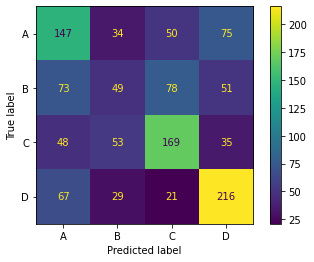

xgboost model accuracy(in %): 0.47615062761506277
xgboost model accuracy(in %): 0.4811715481171548


In [83]:
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#from sklearn.inspection import DecisionBoundaryDisplay
def ModelXgboostClassifierr():

  X,Y=loadTrainData()
  #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  Xtest,Ytest=loadTestData()
  
  #gnb = xgb.XGBClassifier(objective="multi:softprob",random_state=0)
                          #n_estimators =100, min_samples_split= 10, min_samples_leaf= 10, max_depth=10, bootstrap= False)
  #(n_neighbors=7, weights='distance', 
    #                         algorithm='auto', leaf_size=30, p=4, metric='euclidean', metric_params=None, n_jobs=None)
  #gnb.fit(X_train, y_train)
  #SGDClassifier(max_iter=5)
  #y_pred = gnb.predict(X_test)
  kfold = KFold(n_splits=5, shuffle=True, random_state=0)

  scores = []
  i=0
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]

    xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=0)
    xgb_model.fit(X_train, y_train)
    
    predict= xgb_model.predict(Xtest)
    prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
    prediction["ID"]=Ytest
    prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelXgboostClassifierr/xgd.csv')
    y_pred = xgb_model.predict(X_test)
    print("xgboost model accuracy(in %):",metrics.accuracy_score(y_test, y_pred))
    #cm= confusion_matrix(y_test, y_pred)
    #print(cm)
    
    #plot_confusion_matrix(xgb_model, X_test, y_test)  
    #plt.show()

    if (metrics.accuracy_score(y_test, y_pred)>=0.48619246861924686):
       print('INIF..........')
       cm= confusion_matrix(y_test, y_pred)
       print(cm)


       plot_confusion_matrix(xgb_model, X_test, y_test)  
       plt.show()



       predict= xgb_model.predict(Xtest)
       prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
       prediction["ID"]=Ytest
       prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelXgboostClassifierr/xgd.csv')
    i=i+1
  
  #predict= gnb.predict(Xtest)
  #prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
  #print("xgboost model accuracy(in %):",metrics.accuracy_score(y_test, y_pred))
  #prediction["ID"]=Ytest
  #prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelKNeighborsClassifier/KNN 0.csv')
  return
ModelXgboostClassifierr()
#0.48988195615514335
# 0.49409780775716694
#0.4974704890387858  # xgb.XGBClassifier(random_state=0)

In [ ]:
import xgboost as xgb

import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

def ModelXgboostClassifierr1():

    X,Y=loadTrainData()
  #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    Xtest,Ytest=loadTestData()

    xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=0)
    xgb_model.fit(X, Y)
    
    predict= xgb_model.predict(Xtest)
    prediction = pd.DataFrame({'ID':Ytest,'Segmentation': predict})
    prediction["ID"]=Ytest
    prediction.to_csv('/content/drive/MyDrive/PatternPhase2/prediction/ModelXgboostClassifierr/xgd.csv')
    return
    

  
ModelXgboostClassifierr1()
#0.48988195615514335
# 0.49409780775716694
#0.4974704890387858  # xgb.XGBClassifier(random_state=0)

33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


         ID  Gender Ever_Married  Age Graduated     Profession  \
0     10497    Male          Yes   33       Yes       Engineer   
1      5748  Female           No   42       Yes         Doctor   
2      4228    Male          Yes   80       Yes      Executive   
3     10369  Female          Yes   66       Yes         Artist   
4     10442  Female          Yes   39       Yes     Healthcare   
...     ...     ...          ...  ...       ...            ...   
7160   9473    Male          Yes   42       Yes         Artist   
7161   8297    Male          Yes   48       Yes         Artist   
7162   9246  Female          Yes   51       Yes         Artist   
7163   3771  Female          Yes   25        No  NonProfession   
7164    882    Male          Yes   28       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 0.0        Average          2.0  Cat_6            B  
1                 5.0            Low          1.0  Cat_6       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0          0             1   37          1           2              1.0   
1          0             0   21          0           9              2.0   
2          1             0   38          1           0              3.0   
3          1             0   26          1           5              0.0   
4          1             1   68          1           7              0.0   
...      ...           ...  ...        ...         ...              ...   
3525       1             1   79          1           0              3.0   
3526       1             1   40          1           3              1.0   
3527       1             1   73          1           0              5.0   
3528       1             0   20          0           9              3.0   
3529       1             1   58          1           1              1.0   

      Spending_Score  Family_Size  Var_1  
0                  0          6.0      3  
1            

         ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0     10497    Male          Yes   33        No    Engineer              0.0   
1      5748  Female           No   42       Yes      Doctor              5.0   
2      4228    Male          Yes   80        No   Executive              0.0   
3     10369  Female          Yes   66       Yes      Artist              0.0   
4     10442  Female          Yes   39       Yes  Healthcare              8.0   
...     ...     ...          ...  ...       ...         ...              ...   
7160   9473    Male          Yes   42       Yes      Artist              0.0   
7161   8297    Male          Yes   48       Yes      Artist              0.0   
7162   9246  Female          Yes   51       Yes      Artist              8.0   
7163   3771  Female          Yes   25        No    Engineer              2.0   
7164    882    Male          Yes   28        No   Executive              0.0   

     Spending_Score  Family_Size  Var_1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


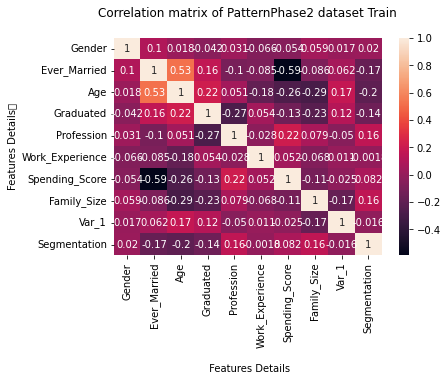

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
test_data = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')
print(test_data)
test_data = test_data.drop(labels=['ID'], axis=1)
print(test_data)
test_data['Segmentation'] = LabelEncoder().fit_transform(test_data['Segmentation'])

test_data=labelEncodingFeature(test_data)
hm = sns.heatmap(test_data.corr(), annot = True)
hm.set(xlabel='\n Features Details', ylabel='Features Details\t', title = "Correlation matrix of PatternPhase2 dataset Train\n")
plt.show()

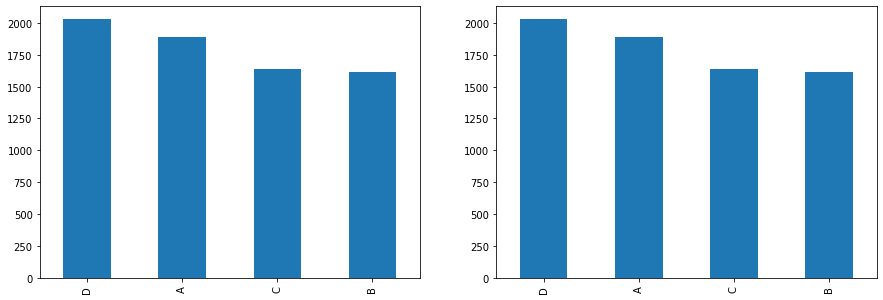

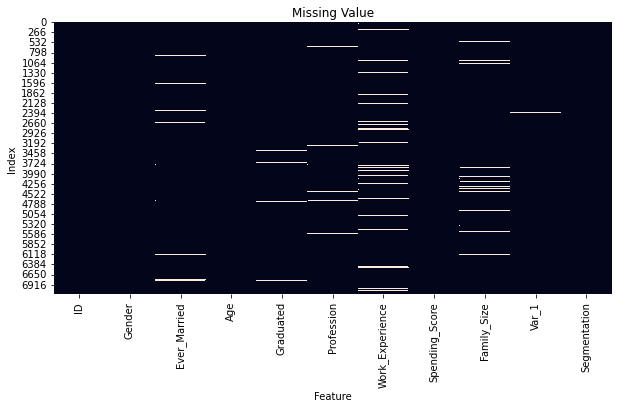

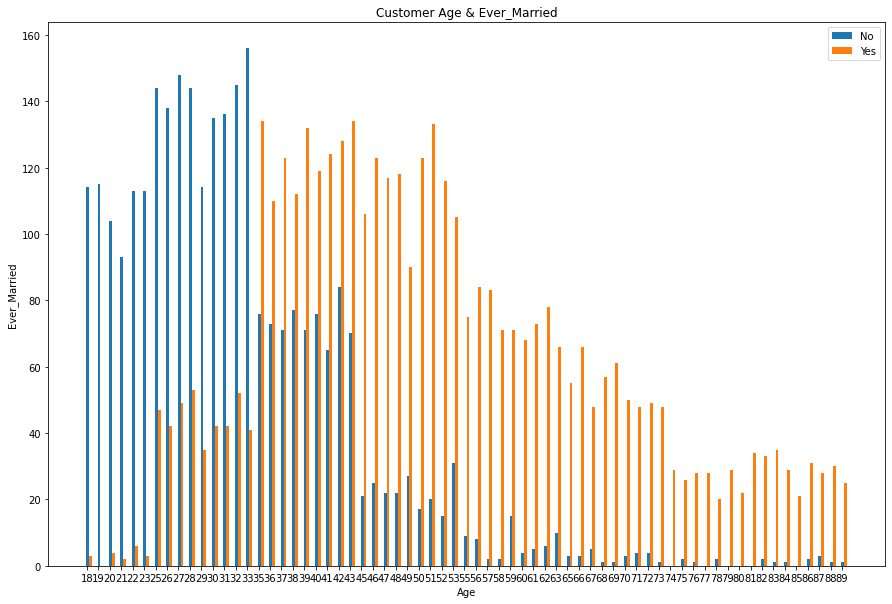

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

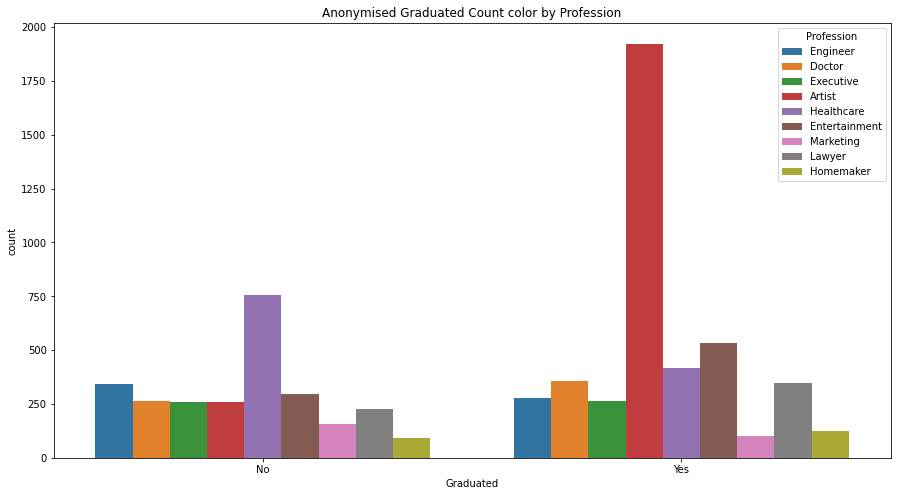

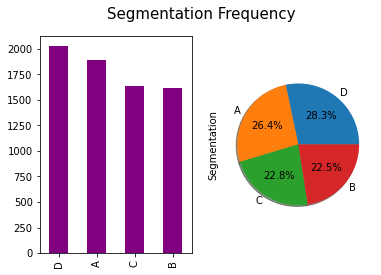

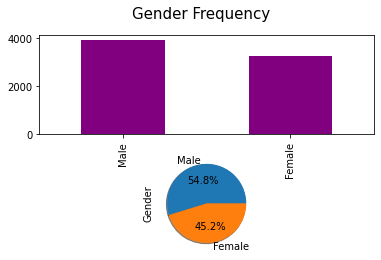

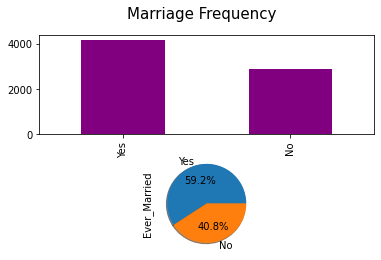

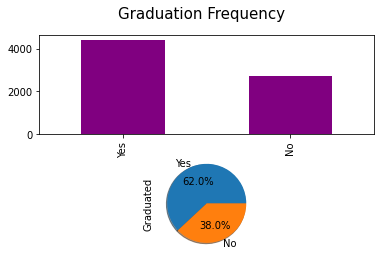

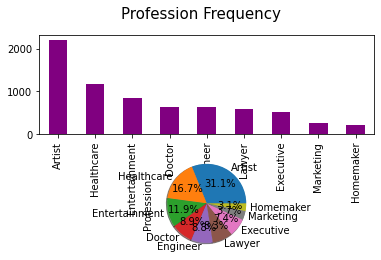

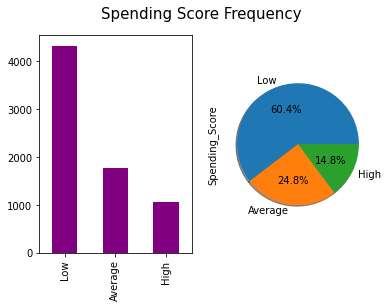

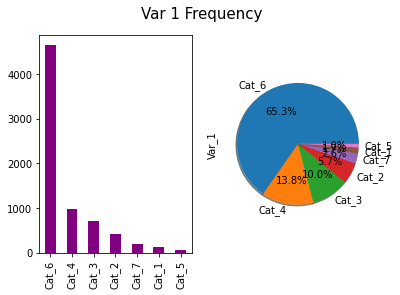

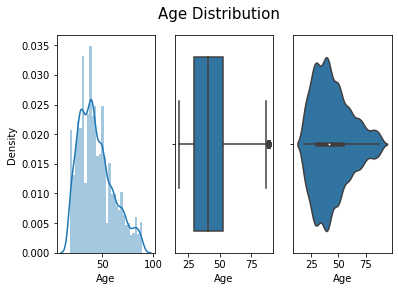

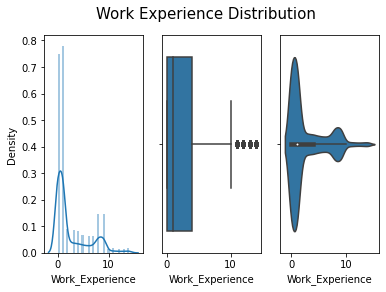

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/PatternPhase2/dataset/train.csv')

#train.groupby(['Profession','Graduated'])[['Graduated']].count().plot(kind = 'barh')
print()
print()
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
train['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
train['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()
print()
print()
plt.subplots(figsize=(10,5))
sns.heatmap(train.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value')
plt.show()
print()
print()

married_based = pd.pivot_table(train,values='ID',index=['Ever_Married'],columns=['Age'],aggfunc=np.count_nonzero)
x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(15,10))
for i in range(len(married_based)):
    ax.bar(x+(i*width),married_based.loc[married_based.index[i]],width=width, label=married_based.index[i])

ax.set_xticks(x+((len(married_based)/8-0.5)*width))
ax.set_xticklabels(married_based.columns)

plt.title('Customer Age & Ever_Married')
ax.set_xlabel('Age')
ax.set_ylabel('Ever_Married')

plt.legend(loc='best',frameon=True)
plt.show()

plt.figure(figsize=(15,8))
plt.title('Anonymised Graduated Count color by Profession')
sns.countplot(data=train,x='Graduated',hue='Profession')







#===================================================


train.drop(["ID"], axis=1, inplace=True)

train= pd.concat([train,pd.get_dummies(train['Gender'],prefix='Gender')],axis=1)
train=pd.concat([train,pd.get_dummies(train['Ever_Married'],prefix='Ever_Married')],axis=1)
train=pd.concat([train,pd.get_dummies(train['Graduated'],prefix='Graduated')],axis=1)
train=pd.concat([train,pd.get_dummies(train['Profession'],prefix='Profession')],axis=1)



train["Spending_Score_Level"] = train["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1
train["Segmentation_Level"] = train["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))+1
train = pd.concat([train, pd.get_dummies(train["Var_1"], prefix="Var_1")], axis=1)

train = pd.concat([train, pd.get_dummies(train["Segmentation"], prefix="Segmentation")], axis=1)
Segmentation_encoding_dl = np.asarray(train[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]])

train["Age_Range"] = np.where(train.Age>=60, "60+", np.where(train.Age>=50, "50-60", np.where(train.Age>=40, "40-50", np.where(train.Age>=30, "30-40", np.where(train.Age>=18, "18-30", "18-")))))

train["Work_Experience_Range"] = np.where(train.Work_Experience>=10, "10+", np.where(train.Work_Experience>=5, "5-10", "0-5"))
train["Family_Size_Range"] = np.where(train.Family_Size>=6, "6+", np.where(train.Family_Size>=3, "3-6", "0-3"))
train["Work_Experience_to_Age_Ratio_Range"] = np.where(train.Work_Experience>=0.5,
                                                       "0.5+", np.where(train.Work_Experience>=0.4, 
                                                                        "0.4-0.5", np.where(train.Work_Experience>=0.3,
                                                                                            "0.3-0.4", np.where(train.Work_Experience>=0.2,
                                                                                                                "0.2-0.3", np.where(train.Work_Experience>=0.1, 
                                                                                                                                    "0.1-0.2", "0+")))))


#Plotting Categorical Variables
print()
print()
fig, ax = plt.subplots(1, 2)
train["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(2, 1)
train["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(2, 1)
train["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(2, 1)
train["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(2, 1)
train["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(1, 2)
train["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()
fig, ax = plt.subplots(1, 2)
train["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Var 1 Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

print()
print()
fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(train["Age"], ax=ax[0])
sns.boxplot(train["Age"], ax=ax[1])
sns.violinplot(train["Age"], ax=ax[2])
print()
print()
fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience Distribution", fontsize=15)
sns.distplot(train["Work_Experience"], ax=ax[0])
sns.boxplot(train["Work_Experience"], ax=ax[1])
sns.violinplot(train["Work_Experience"], ax=ax[2])